# Mandelbrot Set Scaling in OpenMP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/mandelbrot_scaling.csv')

# Head:
# "Threads","Max Iterations","Width","Height","Average time (s)","St. Deviation (s)","Min (s)","Max (s)"

# Convert to appropriate types
df['Threads'] = df['Threads'].astype('int')
df['Max Iterations'] = df['Max Iterations'].astype('int')
df['Width'] = df['Width'].astype('int')
df['Height'] = df['Height'].astype('int')
df['Average time (s)'] = df['Average time (s)'].astype('float')
df['St. Deviation (s)'] = df['St. Deviation (s)'].astype('float')
df['Min (s)'] = df['Min (s)'].astype('float')
df['Max (s)'] = df['Max (s)'].astype('float')

# Convert column names 
df = df.rename(columns={"Threads": "th"})
df = df.rename(columns={"Max Iterations": "mi"})
df = df.rename(columns={"Width": "w"})
df = df.rename(columns={"Height": "h"})
df = df.rename(columns={"Average time (s)": "t"})
df = df.rename(columns={"St. Deviation (s)": "std"})
df = df.rename(columns={"Min (s)": "min"})
df = df.rename(columns={"Max (s)": "max"})

# Compute the speedup as the ratio of the time taken by 1 thread to the time taken by N threads
# Serial time
serial = df[df['th'] == 1]['t'].values[0]
df['speedup'] = serial / df['t']

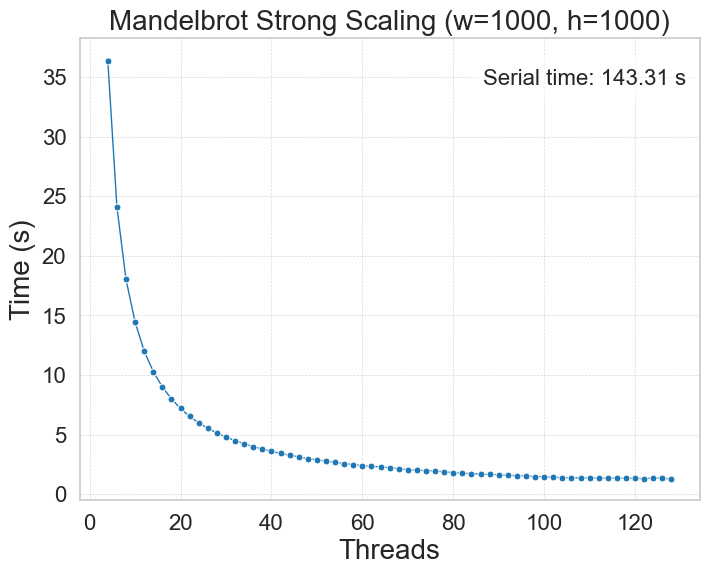

In [18]:
# Timeplot - Strong Scaling

fontsize=20
width=8
height=6

# Plot
plt.figure(figsize=(width,height))

# Set Seaborn theme, grid aesthetic and Matplotlib background and figure size
sns.set_theme(style="whitegrid", 
              palette="tab10", 
              rc={"grid.linestyle": "--", 
                  "grid.color": "gray", 
                  "grid.alpha": 0.3, 
                  "grid.linewidth": 0.5})

# Line and errorbars
# plt.axhline(y=serial, linestyle='--', label='Serial time', linewidth=1.5, color='tab:green')
sns.lineplot(data=df[df["th"]!=1], x="th", y="t", linewidth=1, marker='o', markersize=5, color='tab:blue')
plt.errorbar(df[df["th"]!=1]['th'], df[df["th"]!=1]['t'], yerr=df[df["th"]!=1]['std'], fmt='none', color='tab:blue', elinewidth=0.1, capsize=1.5)

# Labels
image_width = df.iloc[0]["w"]
image_height = df.iloc[0]["h"]
plt.xlabel('Threads', fontsize=fontsize)
plt.ylabel('Time (s)', fontsize=fontsize)
plt.title(f'Mandelbrot Strong Scaling (w={image_width:.0f}, h={image_height:.0f})', fontsize=fontsize)
plt.xticks(fontsize=fontsize-4)
plt.yticks(fontsize=fontsize-4)

# Legend
# plt.legend(title='Max Iterations', fontsize=fontsize-4, title_fontsize=fontsize-4)
# Add text box
plt.text(0.65, 0.9, f'Serial time: {serial:.2f} s', transform=plt.gca().transAxes, 
         fontsize=fontsize-4, bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

# Save plot
# plt.savefig('mandelbrot_scaling.png', dpi=300)
plt.savefig("mandelbrot_scaling.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


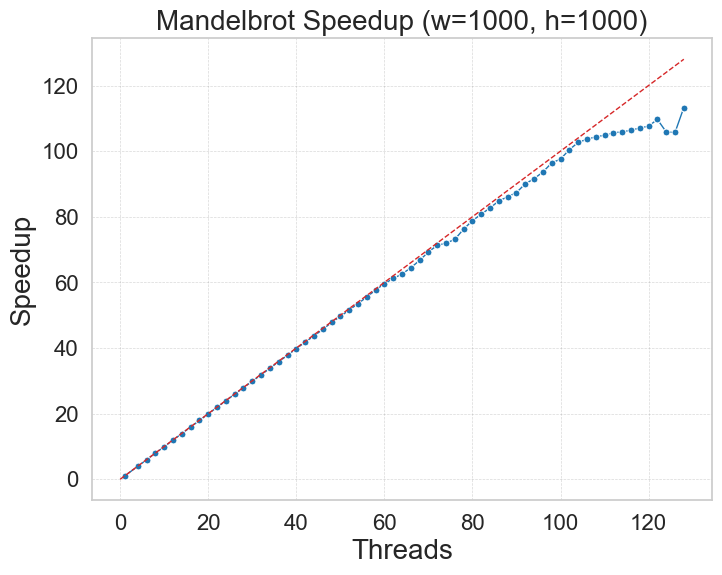

In [14]:
# Sppedup plot

# Plot
plt.figure(figsize=(width,height))

# Set Seaborn theme, grid aesthetic and Matplotlib background and figure size
sns.set_theme(style="whitegrid", 
              palette="tab10", 
              rc={"grid.linestyle": "--", 
                  "grid.color": "gray", 
                  "grid.alpha": 0.3, 
                  "grid.linewidth": 0.5})

# Line and errorbars
sns.lineplot(data=df, x="th", y="speedup", linewidth=1, marker='o', markersize=5, color='tab:blue')
plt.errorbar(df['th'], df['speedup'], yerr=0, fmt='none', color='tab:blue', elinewidth=0.1, capsize=1.5)
plt.plot([0, max(df["th"])], [0, max(df["th"])], color='tab:red', linestyle='--', label='Ideal', linewidth=1)

# Labels
image_width = df.iloc[0]["w"]
image_height = df.iloc[0]["h"]
plt.xlabel('Threads', fontsize=fontsize)
plt.ylabel('Speedup', fontsize=fontsize)
plt.title(f'Mandelbrot Speedup (w={image_width:.0f}, h={image_height:.0f})', fontsize=fontsize)
plt.xticks(fontsize=fontsize-4)
plt.yticks(fontsize=fontsize-4)

# Legend
# plt.legend(title='Max Iterations', fontsize=fontsize-4, title_fontsize=fontsize-4)

# Save plot
# plt.savefig('mandelbrot_speedup.png', dpi=300)
plt.savefig("mandelbrot_speedup.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()